<font color=black size=6>**Condition1 End-Loaded cantilever beam**</font>

In [5]:
import finite_element as fe
import numpy as np
import matplotlib.pyplot as plt

In [32]:
fe = fe.FiniteElement('EB_beam')
# properties of EB theory
dof_per_node = 2

# domain data
L = 12.

# material and load data
P = -10. 
P_x = L
f_e = 0.
EI = 1e4

# mesh data
n_el = 10
n_np = n_el + 1
n_dof = n_np * dof_per_node
x = np.linspace(0, L, n_np)
le = L / n_el 

K = np.zeros((n_dof, n_dof))
f = np.zeros((n_dof, 1))

In [33]:
for ee in range(n_el):
    dof_index = fe.get_dof_index(ee)
    #print(dof_index[0])
    k_16 = fe.get_Ke(le = le, EIe = EI)
    for ii in range(16):
        K[dof_index[0,ii], dof_index[1,ii]] += k_16[ii] 
#f[np.ix_(dof_index)] += fe.get_fe_omega(le = le, fe = f_e)

node_P = np.where(x == P_x)[0][0]
f[2*node_P] += P
free_dof = np.arange(2,n_dof)
K_free = K[np.ix_(free_dof, free_dof)]
f_free = f[np.ix_(free_dof)]


# solve the linear system
w_free = np.linalg.solve(K_free,f_free)
w = np.zeros((n_dof, 1))
w[2:] = w_free

# reaction force
rw = K[0,:].dot(w)
rtheta = K[1,:].dot(w)

# analytical solution
w_analytical = (P * L**3) / (3*EI)
theta_analytical = (P * L**2) / (2*EI)

In [34]:
print('Validation: cantilever with tip load')
print('------------------------------------')
print('Reaction force: ', rw, '\t Reaction moment: ', rtheta)
print('Computed tip deflection: ', w[-2], '\t Analytical tip deflection: ', w_analytical)
print('Computed tip rotation: ', w[-1], '\t Analytical tip rotation: ', theta_analytical)

Validation: cantilever with tip load
------------------------------------
Reaction force:  [10.] 	 Reaction moment:  [120.]
Computed tip deflection:  [-0.576] 	 Analytical tip deflection:  -0.576
Computed tip rotation:  [-0.072] 	 Analytical tip rotation:  -0.072


<font color=green size=5>**Computed result is right!**</font>

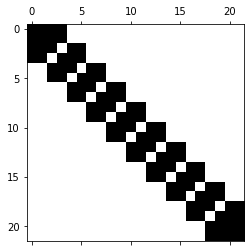

In [35]:
plt.spy(K)
plt.show()

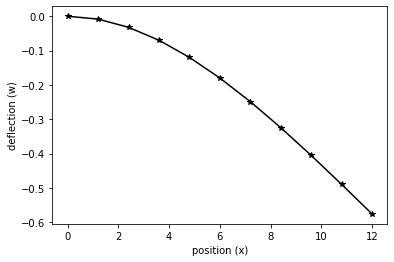

In [36]:
plt.plot(x,w[0::2],'k-*')
plt.xlabel('position (x)')
plt.ylabel('deflection (w)')
plt.show()

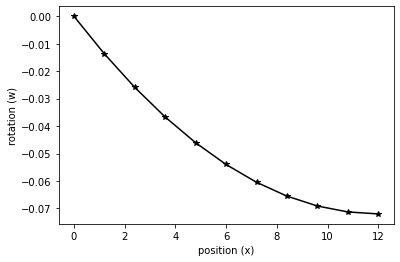

In [37]:
plt.plot(x,w[1::2],'k-*')
plt.xlabel('position (x)')
plt.ylabel('rotation (w)')
plt.show()

<font color=black size=6>**Condition2 Cantilever beam with a distributed load**</font>

In [38]:
import finite_element as fe
import numpy as np
import matplotlib.pyplot as plt

In [39]:
fe = fe.FiniteElement('EB_beam')
# properties of EB theory
dof_per_node = 2

# domain data
L = 12.

# material and load data
P = 0. 
f_e = -1.
EI = 1e4

# mesh data
n_el = 10
n_np = n_el + 1
n_dof = n_np * dof_per_node
x = np.linspace(0, L, n_np)
le = L / n_el 

K = np.zeros((n_dof, n_dof))
f = np.zeros((n_dof, 1))

for ee in range(n_el):
    dof_index = fe.get_dof_index(ee)
    #print(dof_index[0])
    k_16 = fe.get_Ke(le = le, EIe = EI)
    for ii in range(16):
        K[dof_index[0,ii], dof_index[1,ii]] += k_16[ii] ##fe.get_Ke(le = le, EIe = EI)
    f_4 =fe.get_fe_omega(le = le, fe = f_e)
    for ii in range(4):
        f[ee*2+ii] += f_4[ii]

#node_P = np.where(x == P_x)[0][0]
#f[2*node_P] += P
free_dof = np.arange(2,n_dof)
K_free = K[np.ix_(free_dof, free_dof)]
f_free = f[np.ix_(free_dof)]


# solve the linear system
w_free = np.linalg.solve(K_free,f_free)
w = np.zeros((n_dof, 1))
w[2:] = w_free

# reaction force
rw = K[0,:].dot(w)
rtheta = K[1,:].dot(w)

# analytical solution
w_analytical = (f_e * L**4) / (8*EI)
theta_analytical = (f_e * L**3) / (6*EI)

Validation: cantilever with tip load
------------------------------------
Reaction force:  [11.4] 	 Reaction moment:  [71.88]
Computed tip deflection:  [-0.2592] 	 Analytical tip deflection:  -0.2592
Computed tip rotation:  [-0.0288] 	 Analytical tip rotation:  -0.0288


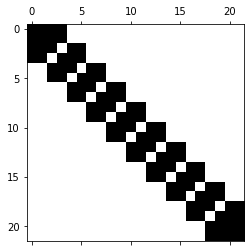

In [40]:
print('Validation: cantilever with tip load')
print('------------------------------------')
print('Reaction force: ', rw, '\t Reaction moment: ', rtheta)
print('Computed tip deflection: ', w[-2], '\t Analytical tip deflection: ', w_analytical)
print('Computed tip rotation: ', w[-1], '\t Analytical tip rotation: ', theta_analytical)
plt.spy(K)
plt.show()

<font color=green size=5>**Computed result is right!**</font>

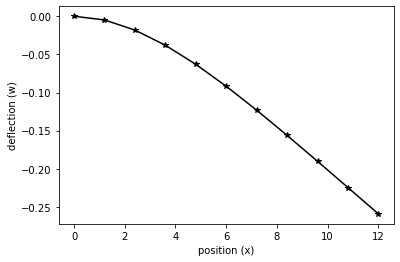

In [41]:
plt.plot(x,w[0::2],'k-*')
plt.xlabel('position (x)')
plt.ylabel('deflection (w)')
plt.show()

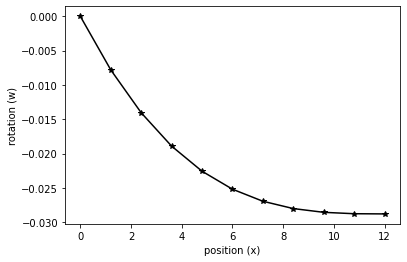

In [42]:
plt.plot(x,w[1::2],'k-*')
plt.xlabel('position (x)')
plt.ylabel('rotation (w)')
plt.show()

<font color=black size=6>**Condition3 Off-Center-Loaded simple beam**</font>

In [43]:
import finite_element as fe
import numpy as np
import matplotlib.pyplot as plt

## Set 1200 points to improve accuracy

In [44]:
fe = fe.FiniteElement('EB_beam')
# properties of EB theory
dof_per_node = 2

# domain data
L = 12.

# material and load data
P = -10. 
P_x = 3.
f_e = 0.
EI = 1e4

# mesh data
n_el = 1200
n_np = n_el + 1
n_dof = n_np * dof_per_node
x = np.linspace(0, L, n_np)
le = L / n_el 

K = np.zeros((n_dof, n_dof))
f = np.zeros((n_dof, 1))


In [45]:
for ee in range(n_el):
    dof_index = fe.get_dof_index(ee)
    #print(dof_index[0])
    k_16 = fe.get_Ke(le = le, EIe = EI)
    for ii in range(16):
        K[dof_index[0,ii], dof_index[1,ii]] += k_16[ii] ##fe.get_Ke(le = le, EIe = EI)
    f_4 =fe.get_fe_omega(le = le, fe = f_e)
    for ii in range(4):
        f[ee*2+ii] += f_4[ii]

## for a simple beam support
## $ w_0 = 0 , w_{end} = 0$
## $ d\frac{w_0}{dt}\neq 0 $ 
## $ d\frac{w_{end}}{dt}\neq 0 $ 

In [46]:
node_P = np.where(x == P_x)[0][0]
f[2*node_P] += P
#print(np.arange(1,n_dof-2))
free_dof = np.append(np.arange(1,n_dof-2),n_dof-1)
#print(free_dof)
K_free = K[np.ix_(free_dof, free_dof)]
f_free = f[np.ix_(free_dof)]

# solve the linear system
w_free = np.linalg.solve(K_free,f_free)
w = np.zeros((n_dof, 1))
for ii in range(1,n_dof-2,1):
    w[ii] = w_free[ii-1]
w[n_dof-1]=w_free[n_dof-3]

w_max = 0.
w_max_index = 0
for ii in range(1,n_dof-2):
    if (w[ii]< w_max) & (ii%2 ==0):
        w_max_index = ii
        w_max = w[ii]
w_max_x = w_max_index /2. * le

# reaction force
rw = K[0,:].dot(w)
rtheta = K[1,:].dot(w)


# analytical solution
w_max_analytical = ((P*P_x)*(L**2-P_x**2)**(3/2))/(9*3**(1/2)*L*EI)
x_max_analytical = L-((L**2-P_x**2)/3)**(1/2)

Validation: cantilever with tip load
------------------------------------
Reaction force:  [7.50000265] 	 Reaction moment:  [-2.2446111e-06]
Computed max deflection:  [-0.02515578] 	 Analytical max deflection:  -0.025155764746872634
Computed MAX deflection at distance:  5.29 	 Analytical MAX deflection at distance:  5.291796067500631


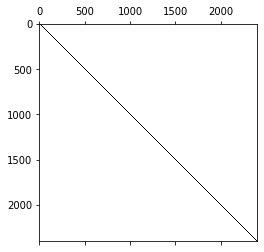

In [47]:
print('Validation: cantilever with tip load')
print('------------------------------------')
print('Reaction force: ', rw, '\t Reaction moment: ', rtheta)
print('Computed max deflection: ', w_max, '\t Analytical max deflection: ', w_max_analytical)
print('Computed MAX deflection at distance: ', w_max_x, '\t Analytical MAX deflection at distance: ', x_max_analytical)
plt.spy(K)
plt.show()

<font color=green size=5>**Computed result is right!**</font>

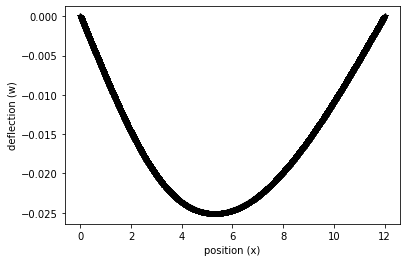

In [48]:
plt.plot(x,w[0::2],'k-*')
plt.xlabel('position (x)')
plt.ylabel('deflection (w)')
plt.show()

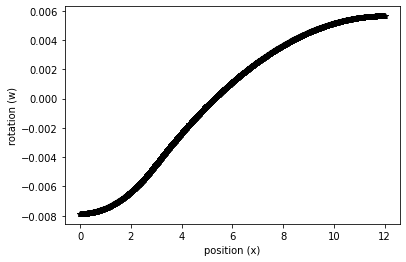

In [49]:
plt.plot(x,w[1::2],'k-*')
plt.xlabel('position (x)')
plt.ylabel('rotation (w)')
plt.show()

<font color=black size=6>**Condition4 Uniformly-Loaded simple beam**</font>

In [4]:
import finite_element as fe
import numpy as np
import matplotlib.pyplot as plt

In [5]:

fe = fe.FiniteElement('EB_beam')
# properties of EB theory
dof_per_node = 2

# domain data
L = 12.

# material and load data
P = 0. 
#P_x = 3.
f_e = -1.
EI = 1e4

# mesh data
n_el = 12
n_np = n_el + 1
n_dof = n_np * dof_per_node
x = np.linspace(0, L, n_np)
le = L / n_el 

K = np.zeros((n_dof, n_dof))
f = np.zeros((n_dof, 1))

In [6]:
for ee in range(n_el):
    dof_index = fe.get_dof_index(ee)
    #print(dof_index[0])
    k_16 = fe.get_Ke(le = le, EIe = EI)
    for ii in range(16):
        K[dof_index[0,ii], dof_index[1,ii]] += k_16[ii] ##fe.get_Ke(le = le, EIe = EI)
    f_4 =fe.get_fe_omega(le = le, fe = f_e)
    for ii in range(4):
        f[ee*2+ii] += f_4[ii]

#node_P = np.where(x == P_x)[0][0]
#f[2*node_P] += P
#print(np.arange(1,n_dof-2))
free_dof = np.append(np.arange(1,n_dof-2),n_dof-1)
#print(free_dof)
K_free = K[np.ix_(free_dof, free_dof)]
f_free = f[np.ix_(free_dof)]

# solve the linear system
w_free = np.linalg.solve(K_free,f_free)
w = np.zeros((n_dof, 1))
for ii in range(1,n_dof-2,1):
    w[ii] = w_free[ii-1]
w[n_dof-1]=w_free[n_dof-3]

## Choose mid_point to verify correctness

Validation: cantilever with tip load
------------------------------------
Reaction force:  [5.5] 	 Reaction moment:  [-0.08333333]
Computed max deflection:  [-0.027] 	 Analytical max deflection:  -0.027


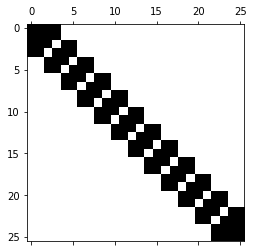

In [7]:
w_mid = w[(n_dof//4)*2]

# reaction force
rw = K[0,:].dot(w)
rtheta = K[1,:].dot(w)


# analytical solution
w_mid_analytical = (5.0*f_e*L**4)/(384.0*EI)

print('Validation: cantilever with tip load')
print('------------------------------------')
print('Reaction force: ', rw, '\t Reaction moment: ', rtheta)
print('Computed max deflection: ', w_mid, '\t Analytical max deflection: ', w_mid_analytical)
plt.spy(K)
plt.show()

<font color=green size=5>**Computed result is right!**</font>

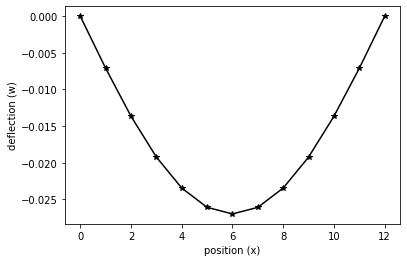

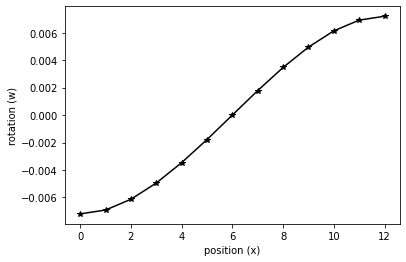

In [8]:
plt.plot(x,w[0::2],'k-*')
plt.xlabel('position (x)')
plt.ylabel('deflection (w)')
plt.show()

plt.plot(x,w[1::2],'k-*')
plt.xlabel('position (x)')
plt.ylabel('rotation (w)')
plt.show()

<font color=black size=6>**Problem A**</font>

In [9]:
import finite_element as fe
import numpy as np
import matplotlib.pyplot as plt

In [10]:
fe = fe.FiniteElement('EB_beam')
# properties of EB theory
dof_per_node = 2

# domain data
L = 12.

# material and load data
P_1 = -10. 
P_x_1 = 4.
P_2 = 5.0
P_x_2 = 8.

f_e = -1.
f_e_d_1 = np.array([-1.]*8) 
f_e_d_2 = np.array([0.]*5)
f_e_d = np.append(f_e_d_1,f_e_d_2)
EI = 1e4

# mesh data
n_el = 12
n_np = n_el + 1
n_dof = n_np * dof_per_node
x = np.linspace(0, L, n_np)
le = L / n_el 

K = np.zeros((n_dof, n_dof))
f = np.zeros((n_dof, 1))
for ee in range(n_el):
    dof_index = fe.get_dof_index(ee)
    #print(dof_index[0])
    k_16 = fe.get_Ke(le = le, EIe = EI)
    for ii in range(16):
        K[dof_index[0,ii], dof_index[1,ii]] += k_16[ii] ##fe.get_Ke(le = le, EIe = EI)
    f_4 =fe.get_dynamic_fe_omega(le = le, fe = f_e_d, node = ee)
    #print(f_4)
    for ii in range(4):
        f[ee*2+ii] += f_4[ii]

node_P = np.where(x == P_x_1)[0][0]
f[2*node_P] += P_1

node_P = np.where(x == P_x_2)[0][0]
f[2*node_P] += P_2

f[-1] = 20.
f[-2] = -20

In [11]:
free_dof = np.arange(2,n_dof)
K_free = K[np.ix_(free_dof, free_dof)]
f_free = f[np.ix_(free_dof)]

# solve the linear system
w_free = np.linalg.solve(K_free,f_free)
w = np.zeros((n_dof, 1))
w[2:] = w_free

# reaction force
rw = K[0,:].dot(w)
rtheta = K[1,:].dot(w)


print('Validation: cantilever with tip load')
print('------------------------------------')
print('Reaction force: ', rw, '\t Reaction moment: ', rtheta)

Validation: cantilever with tip load
------------------------------------
Reaction force:  [32.5] 	 Reaction moment:  [251.91666667]


<font color=green size=5>**Computed result is right!**</font>

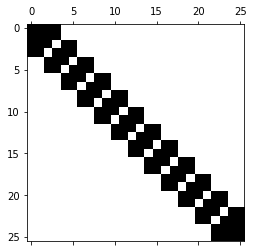

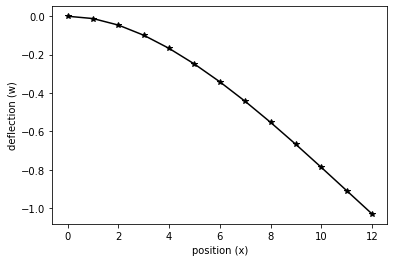

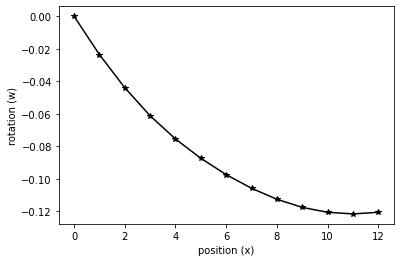

In [13]:
plt.spy(K)
plt.show()
plt.plot(x,w[0::2],'k-*')
plt.xlabel('position (x)')
plt.ylabel('deflection (w)')
plt.show()

plt.plot(x,w[1::2],'k-*')
plt.xlabel('position (x)')
plt.ylabel('rotation (w)')
plt.show()

<font color=black size=6>**Problem B**</font>

## [numerical integration] Gauss quadrature
## a validation example :
## $ \int_0^3 x^2 = 9$

In [4]:
import finite_element as fe
import numpy as np
import matplotlib.pyplot as plt
fe = fe.FiniteElement('EB_beam')

g = np.array([-1/(3**(1/2)),1/(3**(1/2))]) 
b_test = 3.
a_test = 0.
kk = fe.get_gauss_quadrature_index(f= g, a = a_test, b = b_test )
kk_ = kk * kk 
i_gauss = (b_test-a_test)/2.0 * kk_.sum()

print('compuleted intergration result is ',i_gauss)
print('correct result is 9.00')

compuleted intergration result is  9.000000000000002
correct result is 9.00


## the result is right！

------------------------------------
when the number of elements is 3:
at x= 4 m, deflection is  -0.13780692700412814
root mean square of w is  0.28210702018394124
------------------------------------
when the number of elements is 3**2:
at x= 4 m, deflection is  -0.1380988739719582
root mean square of w is  0.3872293323147835
------------------------------------
when the number of elements is 3**3:
at x= 4 m, deflection is  -0.13814620382896137
root mean square of w is  0.4214638924776628
------------------------------------
when the number of elements is 3**4:
at x= 4 m, deflection is  -0.13815160263403065
root mean square of w is  0.4327768866226333


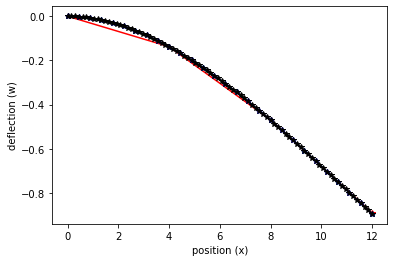

In [3]:
import finite_element as fe
import numpy as np
import matplotlib.pyplot as plt
import math

fe = fe.FiniteElement('EB_beam')
# properties of EB theory


n_el_lookup = [3,3**2,3**3,3**4]
x_4 = np.zeros(4)
w_4 = np.zeros(4)
x_4_node = int(0)
for n_el in n_el_lookup:

    dof_per_node = 2
    # domain data
    L = 12.
    # material and load data
    P_1 = -10. 
    P_x_1 = 4.
    P_2 = 5.0
    P_x_2 = 8.
    EI = 1e4

    # mesh data

    n_np = n_el + 1
    n_dof = n_np * dof_per_node
    x = np.linspace(0, L, n_np)
    le = L / n_el 

    f_e = np.zeros(n_np)
    g = np.array([-1/(3**(1/2)),1/(3**(1/2))])
    ii = int(0)
    while ii*le < 8.0 :
        a_ = ii*le
        b_ = le*(ii+1)
        #print (a_,b_)
        kk = fe.get_gauss_quadrature_index(f= g, a = a_, b = b_ )
        i_ = 0.
        for ee in np.nditer(kk):
            i_ += math.sin(math.pi * ee /8.)
        i_gauss = (b_ - a_)/2 * i_ 
        f_e[ii] = i_gauss/le
        ii += 1

    while ii*le < 12.0 :
        f_e[ii] = 0.
        ii+=1
    #print(f_e)

    K = np.zeros((n_dof, n_dof))
    f = np.zeros((n_dof, 1))
    for ee in range(n_el):
        dof_index = fe.get_dof_index(ee)
        #print(dof_index[0])
        k_16 = fe.get_Ke(le = le, EIe = EI)
        for ii in range(16):
            K[dof_index[0,ii], dof_index[1,ii]] += k_16[ii] ##fe.get_Ke(le = le, EIe = EI)
        f_4 =fe.get_dynamic_fe_omega(le = le, fe = f_e, node = ee)
        #print(f_4)
        for ii in range(4):
            f[ee*2+ii] += f_4[ii]

    node_P = np.where(x == P_x_1)[0][0]
    f[2*node_P] += P_1

    node_P = np.where(x == P_x_2)[0][0]
    f[2*node_P] += P_2

    f[-1] = 20.
    f[-2] = -20

    #print(f)

    free_dof = np.arange(2,n_dof)
    K_free = K[np.ix_(free_dof, free_dof)]
    f_free = f[np.ix_(free_dof)]

    # solve the linear system
    w_free = np.linalg.solve(K_free,f_free)
    w = np.zeros((n_dof, 1))
    w[2:] = w_free
    
    # reaction force
    rw = K[0,:].dot(w)
    rtheta = K[1,:].dot(w)

    #delection at x =4 & \int w   
    x_4[x_4_node] = w[2*int(4./le)]
    w_int = 0.
    for ii in range(n_el):
        w_int += w[2*ii]**2
    w_4[x_4_node] = (w_int/n_el)**(1/2)

    #plt.spy(K)
    #plt.show()

    print('------------------------------------')
    if n_el == 3 :
        color_ ='red'
        print('when the number of elements is 3:')
    elif n_el == 3**2:
        color_ ='green'
        print('when the number of elements is 3**2:')
    elif n_el == 3**3:
        color_ ='blue'
        print('when the number of elements is 3**3:')
    else:
        color_ ='black'
        print('when the number of elements is 3**4:')

    print('at x= 4 m, deflection is ', x_4[x_4_node])
    print('root mean square of w is ', w_4[x_4_node])

    plt.plot(x,w[0::2],'k-*',color = color_)
    plt.xlabel('position (x)')
    plt.ylabel('deflection (w)')
    #plt.show()

    #plt.plot(x,w[1::2],'k-*')
    #plt.xlabel('position (x)')
    #plt.ylabel('rotation (w)')
plt.show()
